Riiid AIEd Challenge 2020 (MIPT ML 2024)
========================================

Пакеты: polars, altair

## Импортируем библиотеки

In [1]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import *

# Снимаем ограничение на количество столбцов
pl.Config.set_tbl_cols(-1)

polars.config.Config

## Загружаем данные в память

In [2]:
data = pl.read_csv("train.csv")
lectures = pl.read_csv("lectures.csv")
questions = pl.read_csv("questions.csv")

## Предобработка

In [3]:
# Убираем столбец row_id
data = data.drop("row_id")

## Первоначальное изучение данных

In [4]:
def info_common(df):
    print("Первые 5 строк")
    display(df.head())
    print("Подсчет пропущенных значений:")
    display(df.null_count())


print("### Анализ датасета 'train.csv':")
info_common(data)
print("### Анализ датасета 'lectures.csv':")
info_common(lectures)
print("### Анализ датасета 'questions.csv':")
info_common(questions)

### Анализ датасета 'train.csv':
Первые 5 строк


timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
i64,i64,i64,i64,i64,i64,i64,f64,bool
0,115,5692,0,1,3,1,null,null
56943,115,5716,0,2,2,1,37000.0,false
118363,115,128,0,0,0,1,55000.0,false
131167,115,7860,0,3,0,1,19000.0,false
137965,115,7922,0,4,1,1,11000.0,false


Подсчет пропущенных значений:


timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,2351538,392506


### Анализ датасета 'lectures.csv':
Первые 5 строк


lecture_id,tag,part,type_of
i64,i64,i64,str
89,159,5,"""concept"""
100,70,1,"""concept"""
185,45,6,"""concept"""
192,79,5,"""solving question"""
317,156,5,"""solving question"""


Подсчет пропущенных значений:


lecture_id,tag,part,type_of
u32,u32,u32,u32
0,0,0,0


### Анализ датасета 'questions.csv':
Первые 5 строк


question_id,bundle_id,correct_answer,part,tags
i64,i64,i64,i64,str
0,0,0,1,"""51 131 162 38"""
1,1,1,1,"""131 36 81"""
2,2,0,1,"""131 101 162 92"""
3,3,0,1,"""131 149 162 29"""
4,4,3,1,"""131 5 162 38"""


Подсчет пропущенных значений:


question_id,bundle_id,correct_answer,part,tags
u32,u32,u32,u32,u32
0,0,0,0,1


## Анализ данных

## 

In [28]:
unique_users = data.unique(pl.col("user_id"))
print(f"Количество пользователей: {len(unique_users)}.")
unique_content_ids = data.unique(pl.col("content_id"))
unique_content_ids_question = unique_content_ids.filter(
    pl.col("content_type_id") == False
)
print(
    f"Среди {len(unique_content_ids)} единиц contend_id только {len(unique_content_ids_question)} являются вопросами."
)
unique_task_container_ids = data.unique(pl.col("task_container_id"))
print(
    f"В датасете всего {len(unique_task_container_ids)} коллекций вопросов и/или лекций."
)

Количество пользователей: 393656.
Среди 13782 единиц contend_id только 13457 являются вопросами.
В датасете всего 10000 коллекций вопрос и/или ответов.


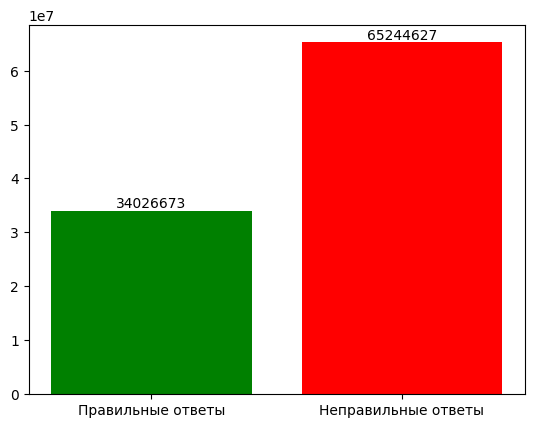

In [6]:
filtered_train = data.filter(pl.col("answered_correctly").is_in([0, 1]))
counts = filtered_train.get_column("answered_correctly").value_counts()["count"]
labels = ["Правильные ответы", "Неправильные ответы"]

plt.bar(
    x=labels,
    height=counts,
    color=["green", "red"],
)
plt.title("Распределение правильности ответов")
for i in zip(labels, counts):
    plt.annotate(text=i[1], xy=i, ha="center", va="bottom")
plt.show()

Видно, что треть ответов - неправильные.

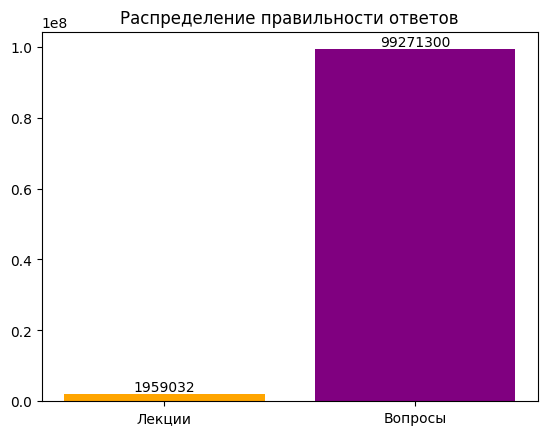

In [43]:
counts = data.get_column("content_type_id").value_counts()["count"]
labels = ["Лекции", "Вопросы"]

plt.bar(
    x=labels,
    height=counts,
    color=["orange", "purple"],
)
plt.title("Распределение правильности ответов")
for i in zip(labels, counts):
    plt.annotate(text=i[1], xy=i, ha="center", va="bottom")
plt.show()

Как видно, количество событий, связанных с вопросами, значительно больше, чем событий, связанных с лекциями.

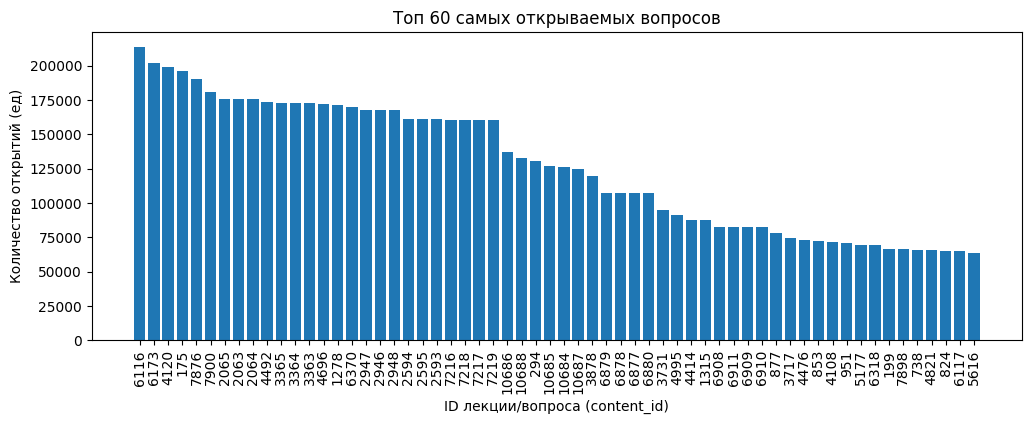

In [40]:
top_n = 60
cids = data["content_id"].value_counts().sort(by="count", descending=True)[:top_n]
plt.figure(figsize=(12, 4))
plt.bar(x=range(0, top_n), height=cids["count"])
plt.xticks(range(0, top_n), cids["content_id"], rotation=90)
plt.xlabel("ID лекции/вопроса (content_id)")
plt.ylabel("Количество открытий (ед)")
plt.title(f"Топ 60 самых открываемых вопросов")
plt.show()

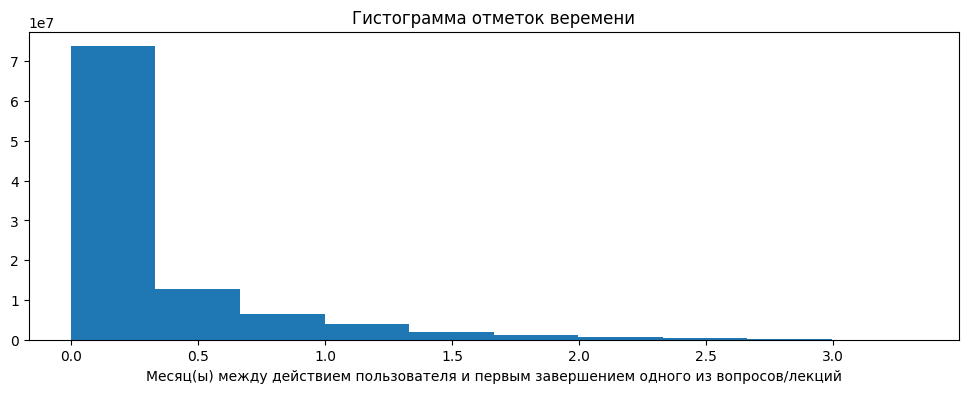

In [34]:
# 1 year = 31536000000 ms
year_in_ms = 365 * 24 * 60 * 60 * 10000
timestamp_month = data["timestamp"] / (year_in_ms / 12)
plt.figure(figsize=(12, 4))
plt.hist(x=timestamp_month)
plt.title("Гистограмма отметок времени")
plt.xlabel(
    "Месяц(ы) между действием пользователя и первым завершением одного из вопросов/лекций"
)
plt.show()

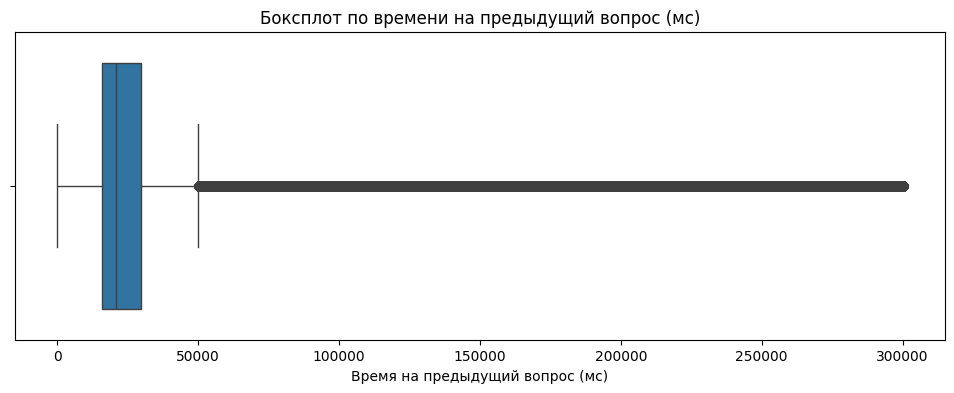

In [38]:
filtered_data = data["prior_question_elapsed_time"].drop_nans()

plt.figure(figsize=(12, 4))
sns.boxplot(x=filtered_data)
plt.title("Боксплот по времени на предыдущий вопрос (мс)")
plt.xlabel("Время на предыдущий вопрос (мс)")
plt.show()

Аномалий не выявлено.

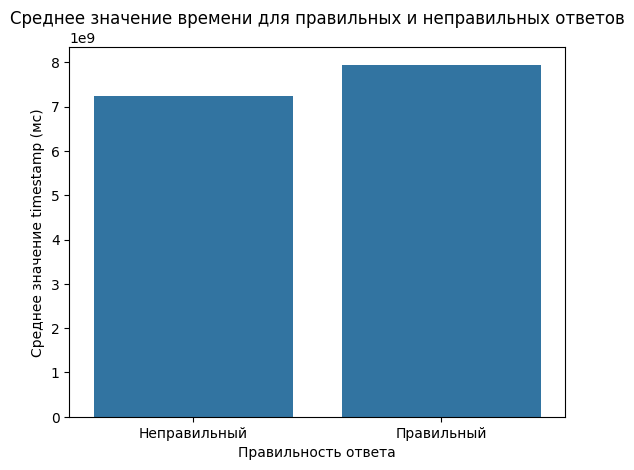

In [63]:
filtered_train = data.filter(pl.col("answered_correctly").is_in([0, 1]))
mean_timestamp_by_correctness = filtered_train.group_by("answered_correctly").mean()
sns.barplot(
    x=mean_timestamp_by_correctness["answered_correctly"],
    y=mean_timestamp_by_correctness["timestamp"],
)
plt.title("Среднее значение времени для правильности ответа")
plt.xlabel("Правильность ответа")
plt.ylabel("Среднее значение timestamp (мс)")
plt.xticks(ticks=[0, 1], labels=["Неправильный", "Правильный"])
plt.show()